# Star Wars Survey

__"Do people consider "The Empire Strikes Back" as the best movie in the Star Wars series?".__ The team at [FiveThirtyEight](https://fivethirtyeight.com/) conducted a survey using SurveyMonkey and gathered 835 responses from Star Wars fans, which can be found in [this Github repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). In this project, we will clean and analyze the data from this repository to find the answer to this question.


## Data
The dataset contains various columns, including:
- RespondentID: An anonymized ID for the survey respondent.
- Gender: The gender of the respondent.
- Age: The age of the respondent.
- Household Income: The respondent's income level.
- Education: The respondent's educational background.
- Location (Census Region): The respondent's location.
- `Yes` or `No` response questions.
- Check box questions.

In [1]:
# Read in the data
import pandas as pd
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [2]:
# Print out the column names
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

## Data Cleaning

We will first convert the "Yes" or "No" responses in the following two columns into "True" or "False", as it's easier to work with boolean values than strings.
- `Have you seen any of the 6 films in the Star Wars franchise?`
- `Do you consider yourself to be a fan of the Star Wars film franchise?`

In [3]:
# Print out the value_counts of the two columns
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


In [4]:
# Convert Yes/No columns into booleans
yes_no = {
    "Yes": True,
    "No": False
}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no,na_action='ignore')
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no,na_action='ignore')

# Print out the value_counts of the two columns
print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False))
print(star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False))

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


The Unnamed columns (Unnamed: 4 - Unnamed: 8) are checkoxes that correspond to the question: "Which of the following Star Wars films have you seen? Please select all that apply."


The columns related to this question are:

1. "Which of the following Star Wars films have you seen? Please select all that apply." — indicating whether the respondent saw Star Wars: Episode I The Phantom Menace.
2. "Unnamed: 4" — indicating whether the respondent saw Star Wars: Episode II Attack of the Clones.
3. "Unnamed: 5" — indicating whether the respondent saw Star Wars: Episode III Revenge of the Sith.
3. "Unnamed: 6" — indicating whether the respondent saw Star Wars: Episode IV A New Hope.
4. "Unnamed: 7" — indicating whether the respondent saw Star Wars: Episode V The Empire Strikes Back.
5. "Unnamed: 8" — indicating whether the respondent saw Star Wars: Episode VI Return of the Jedi.

If the values in the cell represent the name of the movie, it means the respondents have seen the movie. If the value of the cell is NaN, it corresponds to the respondents not having seen the movie or not answering the question. 

We will convert the string values in these cells into boolean values and rename the column names to be more intuitive.

In [5]:
# Convert each column above so that it only contains the values True and False.
import numpy as np

yes_no = {
    "Yes": True,
    "No": False
}
for col in range(3,9):
    episode = star_wars.iloc[:,col].unique()[0]
    print(episode)
    dict_map = {
        episode: True,
        np.NaN: False
    }
    star_wars.iloc[:,col] = star_wars.iloc[:,col].map(dict_map)

Star Wars: Episode I  The Phantom Menace
Star Wars: Episode II  Attack of the Clones
Star Wars: Episode III  Revenge of the Sith
Star Wars: Episode IV  A New Hope
Star Wars: Episode V The Empire Strikes Back
Star Wars: Episode VI Return of the Jedi


In [6]:
# Old column names
print(star_wars.columns[3:9])

# Rename each of the columns above so the names are more intuitive.
new_seen_map = {}
for i in range(1,7):
    new_name = "seen_{}".format(i) 
    new_seen_map[star_wars.columns[i+2]] = new_name
star_wars = star_wars.rename(columns=new_seen_map)

# New column names
print(star_wars.columns[3:9])

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')
Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')


The next six columns represent respondents' rankings of the six different episodes based on their preferences. 
The values in these columns range from 1, indicating the most favorite film, to 6, indicating the least favorite film.

The columns related to the rankings are as follows:

1. "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film." - How much the respondent liked Star Wars: Episode I The Phantom Menace.
2. Unnamed: 10 - How much the respondent liked Star Wars: Episode II Attack of the Clones.
3. Unnamed: 11 - How much the respondent liked Star Wars: Episode III Revenge of the Sith.
4. Unnamed: 12 - How much the respondent liked Star Wars: Episode IV A New Hope.
5. Unnamed: 13 - How much the respondent liked Star Wars: Episode V The Empire Strikes Back.
6. Unnamed: 14 - How much the respondent liked Star Wars: Episode VI Return of the Jedi.

We will convert each column to a numeric type and then rename them accordingly. This way, the representations will be more straightforward and easier to understand.

In [7]:
# Convert the columns above into float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Old column names
print(star_wars.columns[9:15])

# Rename each of the columns above so the names are more intuitive.
new_rank_map = {}
for i in range(1,7):
    new_name = "ranking_{}".format(i) 
    new_rank_map[star_wars.columns[i+8]] = new_name
star_wars = star_wars.rename(columns=new_rank_map)

# New column names
print(star_wars.columns[9:15])

Index(['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')
Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')


## Data Analysis

Now we can find the highest-ranked movie much quicker and easier. 

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


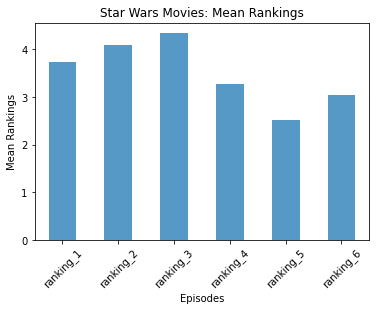

In [8]:
# Find the highest-ranked movie

# Compute the mean of the ranking columns
ranking_mean = star_wars.iloc[:,9:15].mean()
print(ranking_mean)

# Plot out the mean
%matplotlib inline
import matplotlib.pyplot as plt

ranking_mean.plot(kind='bar',alpha=0.75, rot=45)
plt.title('Star Wars Movies: Mean Rankings')
plt.xlabel('Episodes')
plt.ylabel('Mean Rankings')
plt.show()

In the survey, a lower mean ranking indicates a better rank. According to the respondents, Episode V is the most favorite among the six episodes, while Episode III is considered the least favorite.

Let's determine the number of people who have seen the movies. Since the columns have been converted to boolean values, we can sum the columns to find out the total count.

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


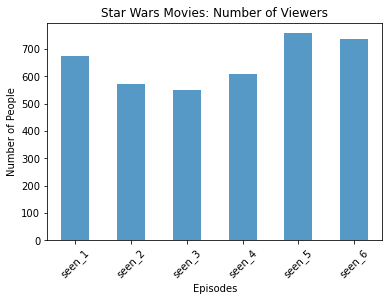

In [9]:
# Number of people who have seen the movies
seen_sum = star_wars.iloc[:,3:9].sum()
print(seen_sum)

# Plot out the results
seen_sum.plot(kind='bar',alpha=0.75, rot=45)
plt.title('Star Wars Movies: Number of Viewers')
plt.xlabel('Episodes')
plt.ylabel('Number of People')
plt.show()

Episode V has the highest number of viewers, while Episode III has the least. This strongly correlates with the favorite rankings, which is sensible since more people would watch episodes that have good ratings.

Now, we will analyze the preferences of different groups of people. The following columns provide us with information about groups:
- Do you consider yourself to be a fan of the Star Wars film franchise? — True or False
- Do you consider yourself to be a fan of the Star Trek franchise? — Yes or No
- Gender — Male or Female

We will divide the data into subsets to compute the most viewed movie, the highest-ranked movie, and other insights we want to learn from different groups

In [10]:
# Split the data into two groups based on the binary columns: 

# "Do you consider yourself to be a fan of the Star Wars film franchise? "
group_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
group_nfans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

# "Do you consider yourself to be a fan of the Star Trek franchise?"
group_fans_t = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "Yes"]
group_nfans_t = star_wars[star_wars["Do you consider yourself to be a fan of the Star Trek franchise?"] == "No"]

# "Gender"
group_male = star_wars[star_wars["Gender"] == "Male"]
group_female = star_wars[star_wars["Gender"] == "Female"]

In [11]:
group_nfans_t

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292765271,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292731220,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292684787,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3292654043,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,3288398062,True,False,True,True,False,False,False,False,2.0,...,Neither favorably nor unfavorably (neutral),I don't understand this question,No,NaN,No,Female,45-60,"$0 - $24,999",High school degree,Middle Atlantic
1178,3288395255,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,18-29,NaN,Less than high school degree,West North Central
1180,3288389603,True,True,True,True,True,True,True,True,3.0,...,Very favorably,Han,No,NaN,No,Female,45-60,"$0 - $24,999",Some college or Associate degree,Pacific
1183,3288375286,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,No,Female,30-44,"$50,000 - $99,999",Bachelor degree,Middle Atlantic


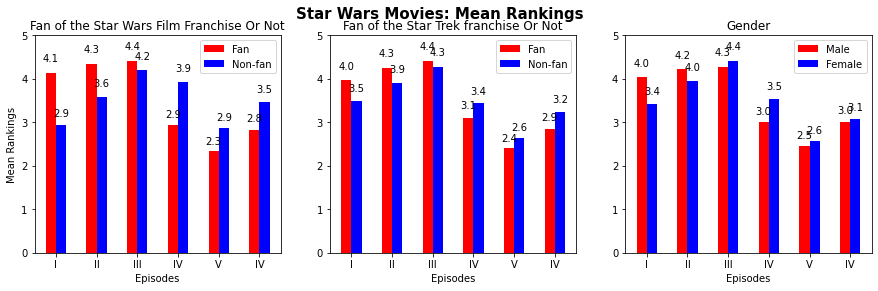

In [12]:
# Find the most viewed movie within different groups
ranking_mean_f = group_fans.iloc[:,9:15].mean()
ranking_mean_nf = group_nfans.iloc[:,9:15].mean()

ranking_mean_f_t = group_fans_t.iloc[:,9:15].mean()
ranking_mean_nf_t = group_nfans_t.iloc[:,9:15].mean()

ranking_mean_male = group_male.iloc[:,9:15].mean()
ranking_mean_female = group_female.iloc[:,9:15].mean()


N = 6
ind = np.arange(N) 
width = 0.25

# Plot out the mean
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

# ax1
rects1 = ax1.bar(ind, ranking_mean_f, width, color='r')
rects2 = ax1.bar(ind + width, ranking_mean_nf, width, color='b')
# add some text for labels, title and axes ticks
ax1.set_ylabel('Mean Rankings')
ax1.set_xlabel('Episodes')
ax1.set_title('Fan of the Star Wars Film Franchise Or Not')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(('I','II','III','IV','V','IV'))
ax1.set_ylim(0,5)
ax1.legend((rects1[0], rects2[0]), ('Fan', 'Non-fan'))

# ax2
rects3 = ax2.bar(ind, ranking_mean_f_t, width, color='r')
rects4 = ax2.bar(ind + width, ranking_mean_nf_t, width, color='b')
# add some text for labels, title and axes ticks
ax2.set_xlabel('Episodes')
ax2.set_title('Fan of the Star Trek franchise Or Not')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(('I','II','III','IV','V','IV'))
ax2.set_ylim(0,5)
ax2.legend((rects3[0], rects4[0]), ('Fan', 'Non-fan'))

# ax3
rects5 = ax3.bar(ind, ranking_mean_male, width, color='r')
rects6 = ax3.bar(ind + width, ranking_mean_female, width, color='b')
# add some text for labels, title and axes ticks
ax3.set_xlabel('Episodes')
ax3.set_title('Gender')
ax3.set_xticks(ind + width / 2)
ax3.set_xticklabels(('I','II','III','IV','V','IV'))
ax3.set_ylim(0,5)
ax3.legend((rects3[0], rects4[0]), ('Male', 'Female'))

def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.1f' % height,
                ha='center', va='bottom')

autolabel(ax1, rects1)
autolabel(ax1, rects2)
autolabel(ax2, rects3)
autolabel(ax2, rects4)
autolabel(ax3, rects5)
autolabel(ax3, rects6)
plt.suptitle('Star Wars Movies: Mean Rankings',fontsize=15, weight='bold')
plt.show()

The general pattern of the mean rankings remains consistent across different groups, with the fifth episode having the highest average ranking and the third episode having the lowest average ranking. There is not much variation between fans and non-fans of the Star Trek franchise or between different genders. However, fans of the Star Wars film franchise hold a different view compared to non-fans, especially for the first episode. Fans rank the first episode much lower than non-fans, while Episode IV has a better ranking among the fans.

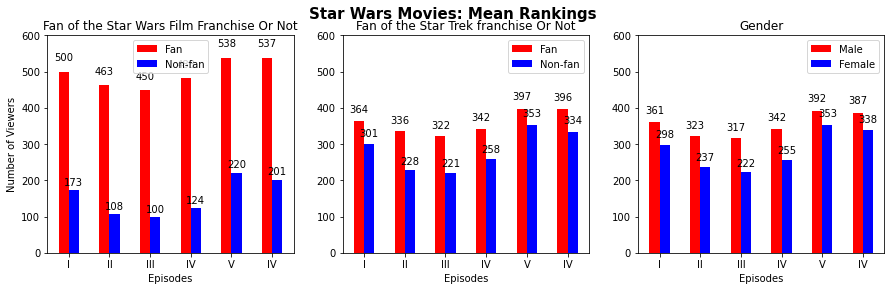

In [13]:
# Find the highest-ranked movie
seen_sum_f = group_fans.iloc[:,3:9].sum()
seen_sum_nf = group_nfans.iloc[:,3:9].sum()

seen_sum_f_t = group_fans_t.iloc[:,3:9].sum()
seen_sum_nf_t = group_nfans_t.iloc[:,3:9].sum()

seen_sum_male = group_male.iloc[:,3:9].sum()
seen_sum_female = group_female.iloc[:,3:9].sum()

N = 6
ind = np.arange(N) 
width = 0.25

# Plot out the mean
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))

# ax1
rects1 = ax1.bar(ind, seen_sum_f, width, color='r')
rects2 = ax1.bar(ind + width, seen_sum_nf, width, color='b')
# add some text for labels, title and axes ticks
ax1.set_ylabel('Number of Viewers')
ax1.set_xlabel('Episodes')
ax1.set_title('Fan of the Star Wars Film Franchise Or Not')
ax1.set_xticks(ind + width / 2)
ax1.set_xticklabels(('I','II','III','IV','V','IV'))
ax1.set_ylim(0,600)
ax1.legend((rects1[0], rects2[0]), ('Fan', 'Non-fan'))

# ax2
rects3 = ax2.bar(ind, seen_sum_f_t, width, color='r')
rects4 = ax2.bar(ind + width, seen_sum_nf_t, width, color='b')
# add some text for labels, title and axes ticks
ax2.set_xlabel('Episodes')
ax2.set_title('Fan of the Star Trek franchise Or Not')
ax2.set_xticks(ind + width / 2)
ax2.set_xticklabels(('I','II','III','IV','V','IV'))
ax2.set_ylim(0,600)
ax2.legend((rects3[0], rects4[0]), ('Fan', 'Non-fan'))

# ax3
rects5 = ax3.bar(ind, seen_sum_male, width, color='r')
rects6 = ax3.bar(ind + width, seen_sum_female, width, color='b')
# add some text for labels, title and axes ticks
ax3.set_xlabel('Episodes')
ax3.set_title('Gender')
ax3.set_xticks(ind + width / 2)
ax3.set_xticklabels(('I','II','III','IV','V','IV'))
ax3.set_ylim(0,600)
ax3.legend((rects3[0], rects4[0]), ('Male', 'Female'))

def autolabel(ax, rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(ax1, rects1)
autolabel(ax1, rects2)
autolabel(ax2, rects3)
autolabel(ax2, rects4)
autolabel(ax3, rects5)
autolabel(ax3, rects6)
plt.suptitle('Star Wars Movies: Mean Rankings',fontsize=15, weight='bold')
plt.show()

Similarly to the pattern for the entire dataset, the number of viewers for different episodes shows a reverse trend compared to the mean rankings. Interestingly, there are much more fans of the Star Wars Film Franchise than non-fans who watched the Star Wars Movies, but most of them do not consider themselves as fans of the Star Trek Franchise. Additionally, the Star Wars Movies appear to attract more male viewers than female viewers.

## Conclusions

In this project, we delved into a survey conducted on Star Wars fans to analyze the rankings and viewer numbers for different episodes of the Star Wars Movies. Our findings revealed the following insights:

- Episode V received the highest ranking and had the most viewers among all the episodes.
- Episode III was considered the least favorite, as it obtained the lowest ranking and had the fewest viewers.
- Fans of the Star Wars film franchise ranked the first episode significantly lower than non-fans, but Episode IV was better received among the fans.
- The number of fans of the Star Wars Film Franchise outweighed the number of non-fans who watched the Star Wars Movies.
- Most of the fans of the Star Wars Film Franchise did not consider themselves fans of the Star Trek Franchise.
- The Star Wars Movies appeared to attract a larger male audience compared to female viewers.

By analyzing these trends and patterns, we gained valuable insights into the preferences and behaviors of Star Wars fans, which can be informative for understanding audience preferences and trends in the context of the Star Wars franchise.

The survey data collected by the team at FiveThirtyEight helped us answer the question "Do people consider 'The Empire Strikes Back' as the best movie in the Star Wars series?" The answer is yes, both fans and non-fans acknowledge that Episode V is considered the best movie in the Star Wars series. This conclusion aligns with the general perception among respondents and further supports the notion that "The Empire Strikes Back" is highly regarded within the Star Wars fan community.